# Imports :

In [50]:
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
from tqdm import tqdm

print('imported')

imported


# Preparing data :

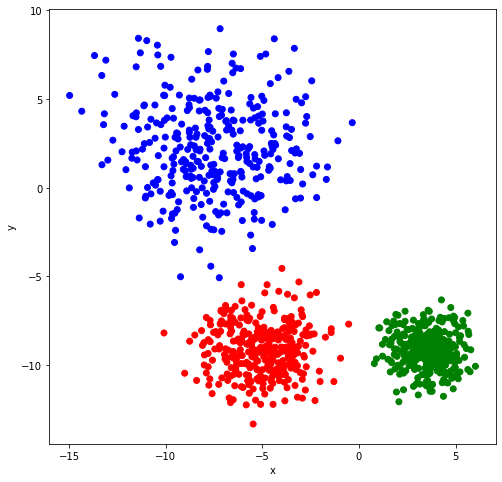

In [51]:
sample_size = 1000
colors = ['red', 'green', 'blue']
std = [1.5, 1, 2.5]


x, y = sklearn.datasets.make_blobs(n_samples=sample_size, cluster_std=std, random_state=41, shuffle=True)
plt.figure(figsize=(8, 8))
plt.scatter(x[:, 0], x[:, 1], c=[colors[x] for x in y])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Implementation of K-means

In [56]:
class KMeans:
    def __init__(self, n_clusters, features):
        self.n_clusters = n_clusters
        self.features = features

    def distance(self, x, y):
        return np.sqrt(np.sum((x - y)**2))

    def init_centroids(self):
        self.centroids = self.features[np.random.randint(self.features.shape[0], size=self.n_clusters)]
        print('centroids:', self.centroids)

    def assign_clusters(self):
        self.classes = np.zeros(self.features.shape[0])
        for i, feature in enumerate(self.features):
            distances = [self.distance(feature, centroid) for centroid in self.centroids]
            self.classes[i] = np.argmin(distances)

    def update_centroids(self):
        for i in range(self.n_clusters):
            self.centroids[i] = np.mean(self.features[self.classes == i], axis=0)

    def fit(self, n_iterations=100):
        self.init_centroids()
        for _ in tqdm(range(n_iterations)):
            self.assign_clusters()
            self.update_centroids()
        self.plot_centroids()

    def plot_centroids(self):
        plt.figure(figsize=(8, 8))
        plt.scatter(self.features[:, 0], self.features[:, 1], c='black', s=10)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c=colors, s=100)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

  2%|▏         | 1/50 [00:00<00:08,  5.92it/s]

centroids: [[  3.00466267  -9.19041421]
 [  2.31072395 -10.45131234]
 [-12.26072218   2.02901284]]


100%|██████████| 50/50 [00:06<00:00,  7.47it/s]


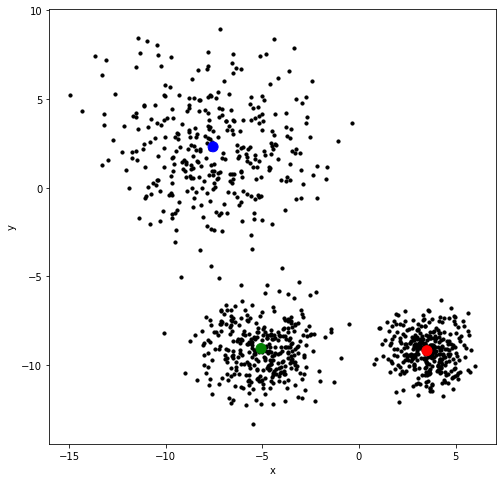

In [55]:
kms = KMeans(3, x)
kms.fit(50)